In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '101c46b1-6577-4ce4-b934-711051564bbf',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#raw data pulled using coinmarketcap api


{'status': {'timestamp': '2023-04-10T15:59:29.571Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [5]:
#type(data)

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10150,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934243e+07,1.934243e+07,False,NaN,1,None,None,None,2023-04-10T15:57:00.000Z,28471.467807,1.365147e+10,35.3145,0.530829,2.057196,1.562043,40.485439,25.820326,64.431847,5.507074e+11,46.2992,5.979008e+11,None,2023-04-10T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 15:59:33.839372
1,1027,Ethereum,ETH,ethereum,6713,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,None,None,None,2023-04-10T15:57:00.000Z,1862.452734,6.237154e+09,6.0095,0.243396,1.308171,3.687178,29.073111,14.023248,39.717616,2.243469e+11,18.8614,2.243469e+11,None,2023-04-10T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 15:59:33.839372
2,825,Tether,USDT,tether,51001,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.021054e+10,8.309174e+10,False,NaN,3,None,None,None,2023-04-10T15:57:00.000Z,1.000738,2.109466e+10,11.9919,0.040220,0.032864,0.038334,-0.789327,0.058472,0.071906,8.026974e+10,6.7494,8.315306e+10,None,2023-04-10T15:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-10 15:59:33.839372
3,1839,BNB,BNB,bnb,1252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578864e+08,1.578864e+08,False,NaN,4,None,None,None,2023-04-10T15:57:00.000Z,312.352490,4.770844e+08,3.3900,0.048430,0.520352,0.552104,13.612003,-2.179503,13.250229,4.931622e+10,4.1461,4.931622e+10,None,2023-04-10T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 15:59:33.839372
4,3408,USD Coin,USDC,usd-coin,11632,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.256883e+10,3.256883e+10,False,NaN,5,None,None,None,2023-04-10T15:57:00.000Z,0.999982,2.929164e+09,22.4548,0.021957,0.020466,-0.002146,8.399103,-0.003168,-0.019602,3.256824e+10,2.7381,3.256824e+10,None,2023-04-10T15:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-10 15:59:33.839372
5,52,XRP,XRP,xrp,929,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,None,None,None,2023-04-10T15:57:00.000Z,0.505016,7.043143e+08,24.2270,0.254317,0.554401,-0.739561,38.613528,25.433975,44.344991,2.610350e+10,2.1946,5.050159e+10,None,2023-04-10T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 15:59:33.839372
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476612e+10,3.566069e+10,False,NaN,7,None,None,None,2023-04-10T15:57:00.000Z,0.389147,1.934274e+08,-2.1287,0.289947,0.152668,0.921852,26.653210,0.547855,21.503039,1.352915e+10,1.1376,1.751163e+10,None,2023-04-10T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 15:59:33.839372
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388816e+11,1.388816e+11,False,NaN,8,None,None,None,2023-04-10T15:57:00.000Z,0.083222,4.090525e+08,-17.6758,0.538327,-0.252026,7.834451,28.643770,-5.691389,8.668825,1.155795e+10,0.9716,1.155795e+10,None,2023-04-10T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-10 15:59:33.839372
8,3890,Polygon,MATIC,polygon,649,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.

In [8]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '101c46b1-6577-4ce4-b934-711051564bbf',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    pd.set_option('display.float_format', lambda x: '%.5f' % x)
    
    if not os.path.isfile(r'C:\Users\CHISA\Api.csv'):
        df.to_csv(r'C:\Users\CHISA\Api.csv', header='columns_names')
    else:
        df.to_csv(r'C:\Users\CHISA\Api.csv', mode= 'a', header=False)
            

In [9]:
import os
from time import time
from time import sleep

for i in range(10):
    api_runner()
    print("Api Runner completed")
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-04-10T15:59:42.781Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-10T16:00:43.573Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-10T16:01:44.885Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-10T16:02:46.055Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

Api Runner completed
{'status': {'timestamp': '2023-04-10T16:03:49.951Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capi

{'status': {'timestamp': '2023-04-10T16:04:51.197Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-10T16:05:53.335Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-10T16:06:54.267Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-10T16:07:55.444Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9146}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10150, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

HTTPSConnectionPool(host='pro-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=10&convert=USD (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001BE0955AB08>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


UnboundLocalError: local variable 'data' referenced before assignment

In [ ]:
df32 = pd.read_csv(r'C:\Users\CHISA\Api.csv')

In [ ]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
#df.head()

In [10]:
df4 = df.groupby('name', sort=False)[['quote.USD.volume_change_24h', 'quote.USD.percent_change_1h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4.head()

,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,35.95070,0.42016,1.43932,40.30347,25.93158,64.25215
Ethereum,6.01810,0.20909,3.57806,29.00403,14.09995,39.60457
Tether,12.52250,0.03679,0.04006,-0.91802,0.03647,0.04926
BNB,3.68670,0.08492,0.65831,13.60868,-2.09328,13.21740
USD Coin,23.48580,0.01914,0.00885,8.30071,-0.02333,-0.02602


In [11]:
df32=df4.stack()
df32.head()

name                                 
Bitcoin  quote.USD.volume_change_24h    35.95070
         quote.USD.percent_change_1h     0.42016
         quote.USD.percent_change_7d     1.43932
         quote.USD.percent_change_30d   40.30347
         quote.USD.percent_change_60d   25.93158
dtype: float64

In [12]:
#type(df32)

In [13]:
df5 = df32.to_frame(name='values')
df5.head()

values
name                                         
Bitcoin quote.USD.volume_change_24h  35.95070
        quote.USD.percent_change_1h   0.42016
        quote.USD.percent_change_7d   1.43932
        quote.USD.percent_change_30d 40.30347
        quote.USD.percent_change_60d 25.93158

In [14]:
#type(df5)

In [15]:
df5.count()

values    60
dtype: int64

In [16]:
index = pd.Index(range(60))
df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.volume_change_24h,35.95070
1,Bitcoin,quote.USD.percent_change_1h,0.42016
2,Bitcoin,quote.USD.percent_change_7d,1.43932
3,Bitcoin,quote.USD.percent_change_30d,40.30347
4,Bitcoin,quote.USD.percent_change_60d,25.93158


In [18]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.volume_change_24h,35.95070
1,Bitcoin,quote.USD.percent_change_1h,0.42016
2,Bitcoin,quote.USD.percent_change_7d,1.43932
3,Bitcoin,quote.USD.percent_change_30d,40.30347
4,Bitcoin,quote.USD.percent_change_60d,25.93158


In [19]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.volume_change_24h', 'quote.USD.percent_change_1h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['24h', '1h', '7d', '30', '60', '90'])
df7.head()

,name,percent_change,values
0,Bitcoin,24h,35.95070
1,Bitcoin,1h,0.42016
2,Bitcoin,7d,1.43932
3,Bitcoin,30,40.30347
4,Bitcoin,60,25.93158


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

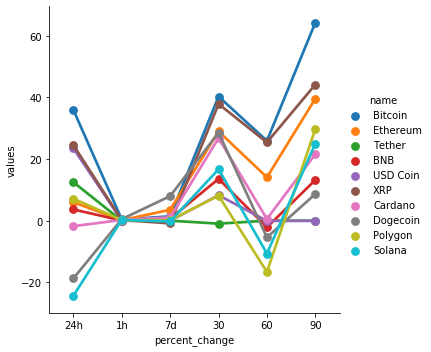

In [21]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [22]:
df11 =  df[['name', 'quote.USD.price','timestamp' ]]
df11 = df11.query("name== 'Bitcoin'")
df11.head()

,name,quote.USD.price,timestamp
0,Bitcoin,28460.58026,2023-04-10 16:07:49.905233


In [29]:
#sns.set_theme(style="darkgrid")
#sns.lineplot(x='timestamp', y='quote.USD.price', data = df11)

In [30]:
df12 =  df[['name', 'quote.USD.price','timestamp' ]]
df12 = df12.query("name== 'Ethereum'")
df12.head()

,name,quote.USD.price,timestamp
1,Ethereum,1862.10334,2023-04-10 16:07:49.905233
